**Ejercicio 6 - Análisis de Supervivencia**

In [2]:
pip install lifelines

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/349.3 kB ? eta -:--:--
   ------- -------------------------------- 61.4/349.3 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 235.5/349.3 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 349.3/349.3 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
   ---------------------------------------- 49.3/49.3 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/94.5 kB ? eta -:--:--
   ---------------------------------------- 94.5/94.5 kB 5.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
   --------------------------------------  481.3/491.3 kB 15.2 MB/s eta 0:00:01
   --------------------------------------- 491.3/491.3 kB 10.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0

<lifelines.CoxPHFitter: fitted with 6 total observations, 2 right-censored observations>
             duration col = 'durations'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 6
number of events observed = 4
   partial log-likelihood = -4.87
         time fit was run = 2024-07-21 23:01:56 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age        0.10      1.11      0.08           -0.05            0.26                0.95                1.30

           cmp to    z    p  -log2(p)
covariate                            
age          0.00 1.30 0.19      2.37
---
Concordance = 0.79
Partial AIC = 11.73
log-likelihood ratio test = 2.04 on 1 df
-log2(p) of ll-ratio test = 2.70

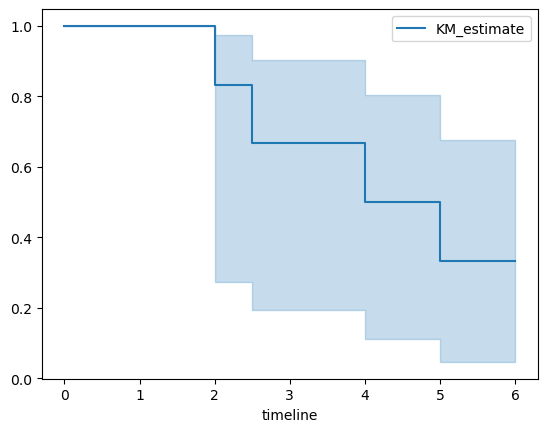

In [3]:
from lifelines import KaplanMeierFitter, CoxPHFitter
import pandas as pd

# Datos de ejemplo
df = pd.DataFrame({
    'durations': [5, 6, 6, 2.5, 4, 2],
    'event_observed': [1, 0, 0, 1, 1, 1]
})

# Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(df['durations'], event_observed=df['event_observed'])
kmf.plot_survival_function()

# Modelo de Cox
df['age'] = [50, 60, 45, 55, 65, 70]
cph = CoxPHFitter()
cph.fit(df, duration_col='durations', event_col='event_observed')
cph.print_summary()

Ejercicio 6 - Análisis de Supervivencia - Ejemplo en R

In [4]:
!pip install rpy2

     ---------------------------------------- 0.0/220.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/220.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/220.0 kB ? eta -:--:--
     - -------------------------------------- 10.2/220.0 kB ? eta -:--:--
     ---------- -------------------------- 61.4/220.0 kB 297.7 kB/s eta 0:00:01
     ------------------------------ ----- 184.3/220.0 kB 743.9 kB/s eta 0:00:01
     ------------------------------------ 220.0/220.0 kB 839.2 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for rpy2: filename=rpy2-3.5.16-py3-none-any.whl size=220719 sha256=a79533310a3d3714d9e41dbb49e90640d8d93452ff1842c21e71

In [5]:
%load_ext rpy2.ipython

: 

In [ ]:
%%R
# Instalar las bibliotecas necesarias en R
install.packages("survival")
install.packages("survminer")

# Cargar las bibliotecas
library(survival)
library(survminer)

# Datos de ejemplo
df <- data.frame(
  durations = c(5, 6, 6, 2.5, 4, 2),
  event_observed = c(1, 0, 0, 1, 1, 1),
  age = c(50, 60, 45, 55, 65, 70)
)

# Modelo Kaplan-Meier
km_fit <- survfit(Surv(durations, event_observed) ~ 1, data = df)
ggsurvplot(km_fit, data = df)

# Modelo de Cox
cox_fit <- coxph(Surv(durations, event_observed) ~ age, data = df)
summary(cox_fit)

